In [1]:
import numpy as np

In [2]:
import pandas as pd

In [60]:
import matplotlib.pyplot as plt
import warnings
import itertools
plt.style.use('fivethirtyeight')
from matplotlib.pyplot import figure
figure(num=None, figsize=(80, 60), dpi=80, facecolor='w', edgecolor='k')
import statsmodels.api as sm

ModuleNotFoundError: No module named 'statsmodels'

<Figure size 6400x4800 with 0 Axes>

In [4]:
df = pd.read_csv('Cleaner_data.csv')

In [5]:
df.columns = ['row ID','Financial_Year','Branch_Code','Sequence_1','Sequence_2','Donation_type','Donor_Age','Donation_Date','Gender','Blood_Group_Code','Donor_Weight','Donor_Temperature','Donor_Pulse','Donor_Hemoglobin','Donor_Blood_Pressure','Test_1','C1','Test_2','C2','Test_3','Test_4']

In [6]:
df = df.dropna()

In [7]:
df['Date'] = pd.to_datetime(df.Donation_Date, format='%d-%b-%y')

In [8]:
df.set_index('Date', inplace=True)

In [9]:
df.head()

,row ID,Financial_Year,Branch_Code,Sequence_1,Sequence_2,Donation_type,Donor_Age,Donation_Date,Gender,Blood_Group_Code,...,Donor_Temperature,Donor_Pulse,Donor_Hemoglobin,Donor_Blood_Pressure,Test_1,C1,Test_2,C2,Test_3,Test_4
Date,,,,,,,,,,,,,,,,,,,,,
2013-07-01,1,14,BRC-01,345,1.0,R,24.0,1-Jul-13,M,5,...,37.0,72,13.0,120/80,0.121,N,0.224,N,R,N
2013-07-01,2,14,BRC-01,346,2.0,R,33.0,1-Jul-13,M,3,...,37.0,72,13.0,120/80,0.122,N,0.222,N,N,N
2013-07-01,3,14,BRC-01,347,3.0,R,28.0,1-Jul-13,M,5,...,37.0,72,13.0,120/80,0.123,N,0.221,N,N,N
2013-07-01,4,14,BRC-01,348,4.0,R,20.0,1-Jul-13,M,3,...,37.0,72,13.0,120/80,0.123,N,0.242,N,N,N
2013-07-01,5,14,BRC-01,349,5.0,T,22.0,1-Jul-13,M,7,...,37.0,72,13.0,120/80,0.124,N,0.243,N,N,N


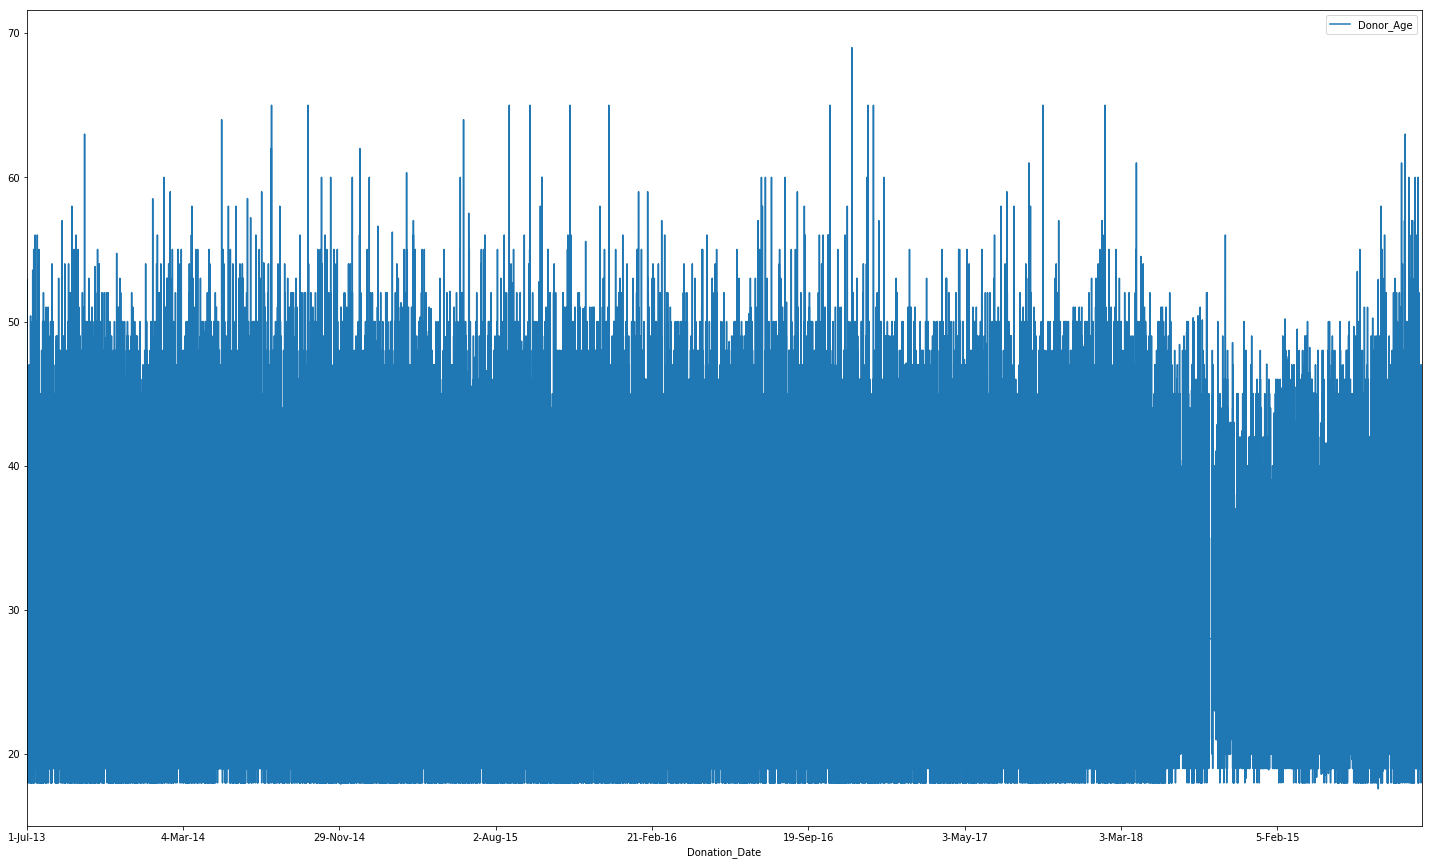

In [10]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 25
fig_size[1] = 15
df.plot('Donation_Date', 'Donor_Age')

In [11]:
print("Current size:", fig_size)

Current size: [25, 15]


In [12]:
df['Donor_Age'].resample().mean()

TypeError: resample() missing 1 required positional argument: 'rule'

In [44]:
monthly_summary = pd.DataFrame()
monthly_summary['Donor_Age'] = df['Donor_Age'].resample('M').mean()
monthly_summary['Donor_Weight'] = df['Donor_Weight'].resample('M').mean()
monthly_summary['Blood_Group_Code'] = df['Blood_Group_Code'].resample('M').mean()
monthly_summary['Donor_Temperature'] = df['Donor_Temperature'].resample('M').mean()
monthly_summary['Donor_Pulse'] = df['Donor_Pulse'].resample('M').mean()
monthly_summary['Donor_Hemoglobin'] = df['Donor_Hemoglobin'].resample('M').mean()
monthly_summary['Test_1'] = df['Test_1'].resample('M').mean()
monthly_summary['Test_2'] = df['Test_2'].resample('M').mean()

In [45]:
monthly_summary = monthly_summary.truncate(before='2016-01-05', after='2017-06-05')


In [46]:
monthly_summary.head()

,Donor_Age,Donor_Weight,Blood_Group_Code,Donor_Temperature,Donor_Pulse,Donor_Hemoglobin,Test_1,Test_2
Date,,,,,,,,
2016-01-31,28.750469,73.369656,3.618129,37.000321,73.233044,13.034908,0.231897,63.113129
2016-02-29,28.934682,75.401719,3.669402,36.999609,72.491989,13.008597,0.617841,54.743598
2016-03-31,28.579593,72.719046,3.654156,37.000000,72.260961,13.034549,0.172371,64.980092
2016-04-30,28.846367,72.574519,3.614354,37.000000,72.359203,13.061298,0.164813,61.750550
2016-05-31,28.592782,73.809009,3.613385,37.000257,72.134620,13.030373,0.131451,69.675042


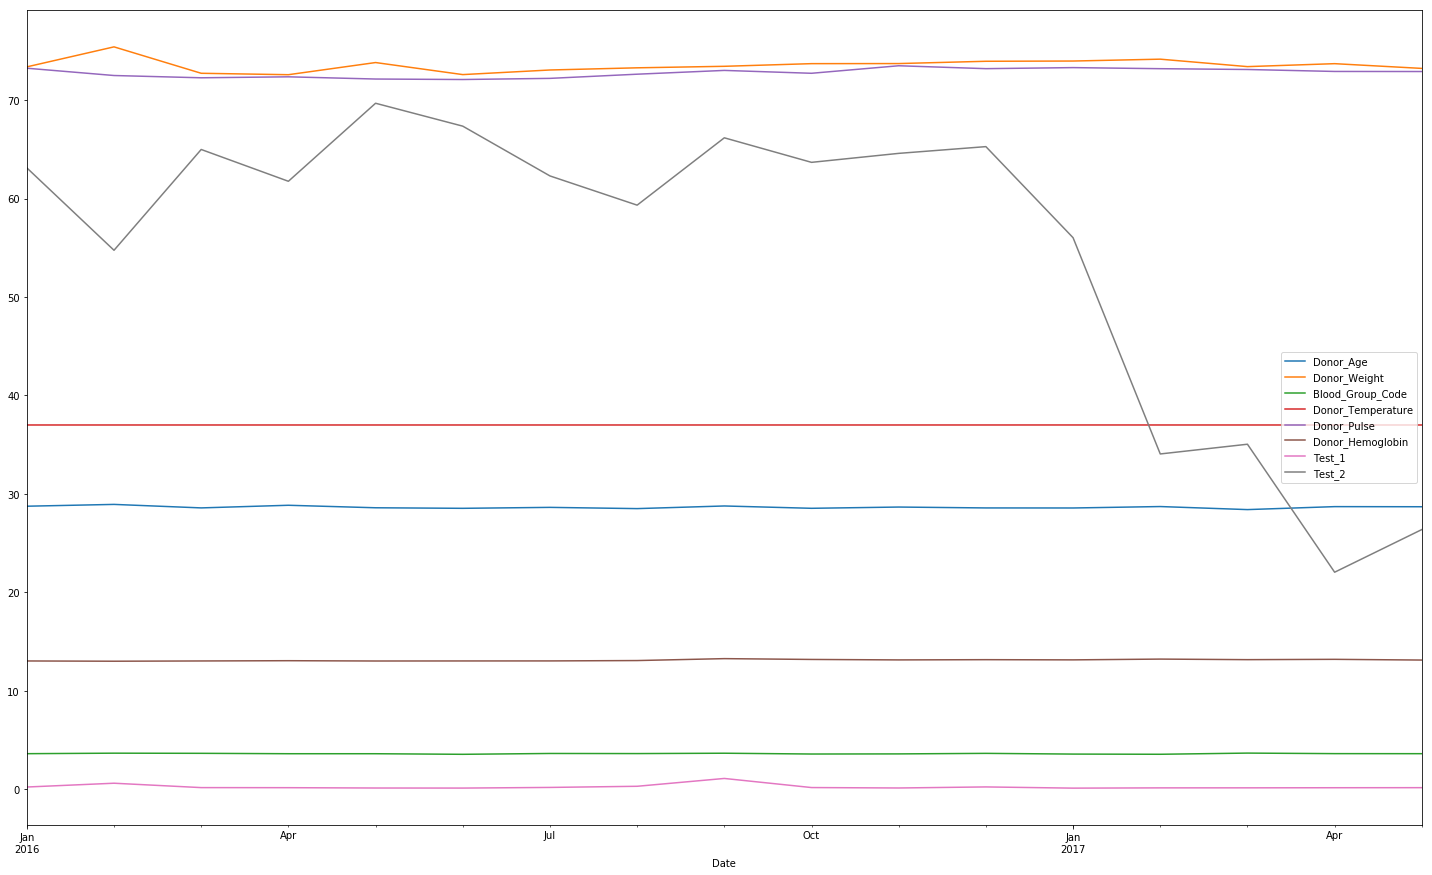

In [47]:
monthly_summary.plot()

In [50]:
daily_summary = pd.DataFrame()
daily_summary['Donor_Age'] = df['Donor_Age'].resample('D').mean()
daily_summary['Donor_Weight'] = df['Donor_Weight'].resample('D').mean()
daily_summary['Blood_Group_Code'] = df['Blood_Group_Code'].resample('D').mean()
daily_summary['Donor_Temperature'] = df['Donor_Temperature'].resample('D').mean()
daily_summary['Donor_Pulse'] = df['Donor_Pulse'].resample('D').mean()
daily_summary['Donor_Hemoglobin'] = df['Donor_Hemoglobin'].resample('D').mean()
daily_summary['Test_1'] = df['Test_1'].resample('D').mean()
daily_summary['Test_2'] = df['Test_2'].resample('D').mean()



In [56]:
yearly_summary = pd.DataFrame()
yearly_summary['Donor_Age'] = df['Donor_Age'].resample('Y').mean()
yearly_summary['Donor_Weight'] = df['Donor_Weight'].resample('Y').mean()
yearly_summary['Blood_Group_Code'] = df['Blood_Group_Code'].resample('Y').mean()
yearly_summary['Donor_Temperature'] = df['Donor_Temperature'].resample('Y').mean()
yearly_summary['Donor_Pulse'] = df['Donor_Pulse'].resample('Y').mean()
yearly_summary['Donor_Hemoglobin'] = df['Donor_Hemoglobin'].resample('Y').mean()
yearly_summary['Test_1'] = df['Test_1'].resample('Y').mean()
yearly_summary['Test_2'] = df['Test_2'].resample('Y').mean()



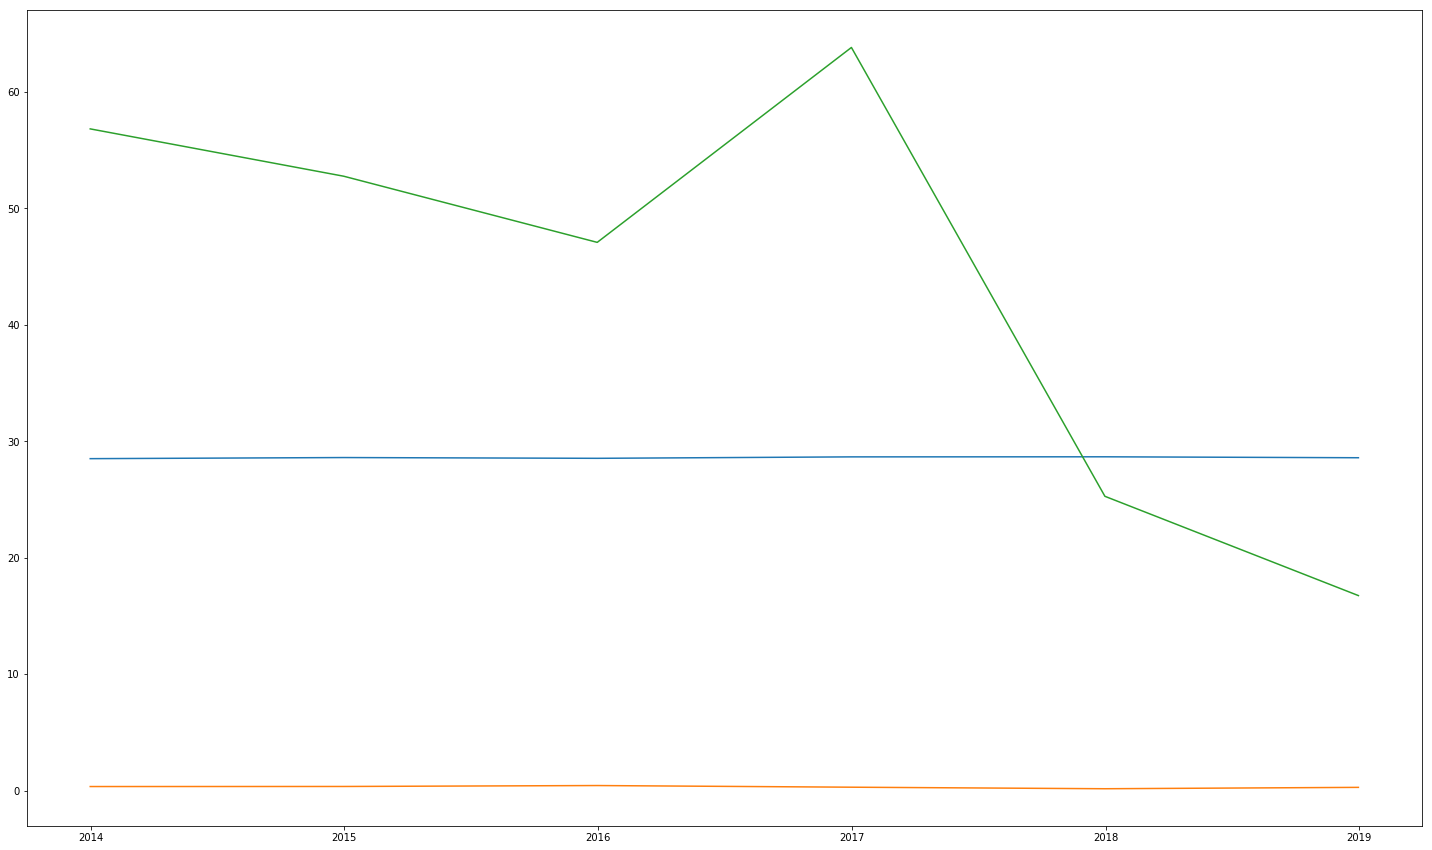

In [57]:
plt.plot(yearly_summary)

In [58]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

NameError: name 'itertools' is not defined